<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Aula**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Aulas**

## 0\. Abordagens estatísticas

*   **Descritiva**: foco no passado para entender o **presente**.
*   <font color='red'>**Preditiva**</font>: foca no passado para inferir o **futuro**.

## 1\. Regressão

### **1.1. Motivação**

> Dado a **altura** de um jogador, qual deve ser seu **peso**?

Queremos uma equação matemática que represente esta relação. Uma possível equação seria a equação linear de primero grau:

 > $y = f(x) = \textbf{a}x + \textbf{b}$

O número $\textbf{a}$ é chamado de coeficiente angular e controla a inclinação da reta, já o número $\textbf{b}$ é chamado de coeficiente linear e indica o deslocamento horizontal da reta. A idéia é predizer o peso que um atleta deve ter dado a sua altura, ou seja:

 > $peso = f(altura) = \textbf{a}(altura) + \textbf{b}$

Qual o melhor valor de $\textbf{a}$ e $\textbf{b}$ para esse conjunto de dados?

### **1.2. Regressão Linear**

A regressão linear é um abordagem estatística que busca encontrar a relaçao entre um atributo alvo $y$ (variável resposta) e um conjunto de atributos preditores $x_i$ através de uma linha reta (em uma ou mais dimensões), relação essa preferencialmente **causal**. De maneira geral, busca encontrar $\textbf{a}_i$ e $\textbf{b}$ tal que:

 > $y = f(x_i) = (\sum_{i=1}^{n} \textbf{a}_ix_i) + \textbf{b}$

Para apenas uma dimensão ou um atributo, temos:

 > $y = f(x_1) = \textbf{a}_1x_1 + \textbf{b}$

- **Exemplo**: peso como função da altura.

 > $peso = f(altura) = \textbf{a}(altura) + \textbf{b}$

Através do **treino** do modelo, encontra-se os valores de $\textbf{a}$ e $\textbf{b}$ que melhor se ajustam a um conjunto de dados.

### **1.3. Pacote Scikit-Learn**

Pacote Python para ciência de dados e *machine learning*. A documentação pode ser encontrada neste [link](https://scikit-learn.org/stable/). Possuí diversos modelos para aprendizado supervisionado, não supervisionado, etc. além de métodos auxiliares. Para regressão linear, temos:

In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
model = LinearRegression()

## 2\. Dados

### **2.1. Pré-processamento**

Neste módulo, vamos utilizar dados sobre o salário mensal em dólares americados de jogadores da NBA em 2020. O conjunto de dados está neste [link](https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/nba.csv) e é uma cópia do conjunto de dados do Kaggle, presente neste [link](https://www.kaggle.com/isaienkov/nba2k20-player-dataset).

In [3]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/nba.csv" -O nba.csv

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
nba = pd.read_csv("nba.csv")

Vamos conhecer um pouco melhor o conjunto de dados.

In [6]:
nba.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [7]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


In [8]:
nba.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,429.0,76.37296,5.657748,67.0,72.0,75.0,79.0,97.0
draft_year,429.0,2014.09324,3.937678,2001.0,2012.0,2015.0,2017.0,2019.0


In [9]:
nba.drop(["rating", "draft_year"], axis=1).describe()

,full_name,jersey,team,position,b_day,height,weight,salary,country,draft_round,draft_peak,college
count,429,429,406,429,429,429,429,429,429,429,429,363
unique,429,52,30,7,415,20,84,308,39,3,57,111
top,LeBron James,#0,Milwaukee Bucks,G,09/19/96,6-6 / 1.98,215 lbs. / 97.5 kg.,$1416852,USA,1,Undrafted,Kentucky
freq,1,79,17,169,2,50,23,20,323,257,67,26


Vamos selecionar os atributos que podem estar relacionados com o salário de um jogador e manipular um a um. Como estamos modelando o problema como se o peso fosse uma função exclusiva da altura de um jogador, temos:

In [10]:
data = nba[["weight", "height"]]

In [11]:
data.head()

,weight,height
0,250 lbs. / 113.4 kg.,6-9 / 2.06
1,225 lbs. / 102.1 kg.,6-7 / 2.01
2,242 lbs. / 109.8 kg.,6-11 / 2.11
3,230 lbs. / 104.3 kg.,6-10 / 2.08
4,220 lbs. / 99.8 kg.,6-5 / 1.96


 - **Height**: Atributo numérico, formatar e padronizar.

In [12]:
data[['height']].head()

,height
0,6-9 / 2.06
1,6-7 / 2.01
2,6-11 / 2.11
3,6-10 / 2.08
4,6-5 / 1.96


In [13]:
data['height'] = data['height'].apply(lambda height: float(height.split(sep='/')[-1].strip()))

<ipython-input-13-f44fd01fdbc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'] = data['height'].apply(lambda height: float(height.split(sep='/')[-1].strip()))


In [14]:
data[['height']].describe().T

,count,mean,std,min,25%,50%,75%,max
height,429.0,1.995641,0.083514,1.75,1.93,2.01,2.06,2.24


 - **Weight**: Variável resposta numérica, formatar.



In [15]:
data[['weight']].head()

,weight
0,250 lbs. / 113.4 kg.
1,225 lbs. / 102.1 kg.
2,242 lbs. / 109.8 kg.
3,230 lbs. / 104.3 kg.
4,220 lbs. / 99.8 kg.


In [16]:
data['weight'] = data['weight'].apply(lambda weight: float(weight.split(sep='/')[-1].split(sep='kg')[0].strip()))

<ipython-input-16-f71adc214c62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weight'] = data['weight'].apply(lambda weight: float(weight.split(sep='/')[-1].split(sep='kg')[0].strip()))


In [17]:
data[['weight']].describe().T

,count,mean,std,min,25%,50%,75%,max
weight,429.0,97.219814,10.536428,77.1,89.4,96.6,104.3,131.5


O resultado do pré-processamento nos trás um dado limpo e pronto para ser utilizado no treino do modelo.

In [18]:
data.head()

,weight,height
0,113.4,2.06
1,102.1,2.01
2,109.8,2.11
3,104.3,2.08
4,99.8,1.96


### **2.2. Treino / Teste**

De maneira geral, um modelo de aprendizagem supervisionada precisa ser treinado com um conjunto de dados e avaliado com outro, assim conseguimos enter um pouco melhor a capacidade do modelo em **generalizar** as predições com dados não visto, que é a situação real em que será utilizado. Para tanto, dividimos nossa base de dados em duas: uma maior de **treino** e uma menor de **testes**.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['weight'], axis=1),
    data['weight'],
    test_size=0.25,
    random_state=123
)

 - **Variáveis preditoras (predictors)**

In [21]:
predictors_train.head()

,height
200,2.03
0,2.06
337,1.91
148,1.98
349,2.11


In [22]:
predictors_train.shape

(321, 1)

In [23]:
predictors_test.head()

,height
13,1.98
266,2.08
330,2.13
220,2.01
240,2.03


In [24]:
predictors_test.shape

(108, 1)

 - **Variável resposta (target)**

In [25]:
target_train.head()

,weight
200,108.9
0,113.4
337,82.1
148,94.8
349,113.4


In [26]:
target_train.shape

(321,)

In [27]:
target_test.head()

,weight
13,93.0
266,99.8
330,98.0
220,111.1
240,101.6


In [28]:
target_test.shape

(108,)

## 3\. Treino

O treino de modelos de aprendizagem supervisionada consiste na etapa de calculo dos coeficientes do modelo baseado na associação da variável resposta com os variáveis preditoras através do uso de um ou mais algoritmos. No caso da regressão linear, estamo interessados em definir os valores de $\textbf{a}_i$ e $\textbf{b}$:

 > $y = f(x_i) = (\sum_{i=1}^{n} \textbf{a}_ix_i) + \textbf{b}$

### **3.1. Algoritmo**

O treino de um modelo de regressão linear é feito através do uso do método de gradiente (explicação neste [link](https://en.wikipedia.org/wiki/Gradient_descent)). A explicação do algoritmo foge do escopo desse curso mas a idéia é que busca-se minimizar a diferença entre os pontos e a reta definida por $\textbf{a}_i$ e $\textbf{b}$, ou seja, encontrar os valores de $\textbf{a}_i$ e $\textbf{b}$ que define a reta que esta mais "perto" de todos os pontos da base de dados de treino.

In [3]:
model = model.fit(predictors_train, target_train)

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Gerando dados sintéticos para um exemplo com múltiplos preditores
np.random.seed(0)
n_samples = 100

# Criando 3 preditores (x1, x2, x3) com algum ruído
x1 = 2 * np.random.rand(n_samples, 1)
x2 = 3 * np.random.rand(n_samples, 1)
x3 = 4 * np.random.rand(n_samples, 1)

# Combinando os preditores em uma única matriz de entrada
X = np.hstack([x1, x2, x3])

# Gerando o target com a relação linear y = a1*x1 + a2*x2 + a3*x3 + b + ruído
a1, a2, a3 = 3, 5, 7  # Coeficientes
b = 4  # Intercepto
y = a1*x1 + a2*x2 + a3*x3 + b + np.random.randn(n_samples, 1)

# Dividindo os dados em conjuntos de treino e teste
predictors_train, predictors_test, target_train, target_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(predictors_train, target_train)

# Fazendo previsões no conjunto de teste
predictions = model.predict(predictors_test)

# Avaliando o modelo
mse = mean_squared_error(target_test, predictions)
print(f"Erro Quadrático Médio: {mse}")

# Exibindo os coeficientes do modelo
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")


Erro Quadrático Médio: 0.7437039010764416
Coeficientes: [[2.78811963 4.85698025 7.08166635]]
Intercepto: [4.07513127]


In [5]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 3,
 'coef_': array([[2.78811963, 4.85698025, 7.08166635]]),
 'rank_': 3,
 'singular_': array([10.7185357 ,  7.29645466,  4.9974124 ]),
 'intercept_': array([4.07513127])}

In [6]:
a = model.coef_
print(a)

[[2.78811963 4.85698025 7.08166635]]


In [7]:
b = model.intercept_
print(b)

[4.07513127]


Logo, temos:

 > $y = f(x) = \textbf{a}x + \textbf{b}$

 > $peso = f(altura) = \textbf{a}(altura) + \textbf{b}$

 > $peso = f(altura) = \textbf{88.9746} * (altura) - \textbf{80.2631}$

Com o modelo treinado, estamos prontos para fazer predições.

In [60]:
import pandas as pd

# Definir os parâmetros da equação
a = 88.9746
b = -80.2631

# Usar um caminho absoluto para garantir que o arquivo seja encontrado
caminho_arquivo_entrada = 'C:/Users/SeuUsuario/Documentos/arquivo.csv'  # Substitua pelo caminho correto
caminho_arquivo_saida = 'C:/Users/SeuUsuario/Documentos/arquivo_resultado.csv'  # Substitua pelo caminho correto

try:
    # Carregar os dados do arquivo CSV
    data = pd.read_csv(caminho_arquivo_entrada)

    # Aplicar o modelo para prever o peso com base na altura
    data['peso_previsto'] = a * data['altura'] + b

    # Exibir a primeira linha do DataFrame com a coluna de peso previsto
    print(data.head(1))

    # Salvar o DataFrame atualizado com a coluna de peso previsto em um novo arquivo CSV
    data.to_csv(caminho_arquivo_saida, index=False)
    print(f"Arquivo salvo em: {caminho_arquivo_saida}")

except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado em {caminho_arquivo_entrada}")



Erro: O arquivo não foi encontrado em C:/Users/SeuUsuario/Documentos/arquivo.csv


In [61]:
import numpy as np

# Coeficientes do modelo treinado (exemplo)
a = 88.9746
b = -80.2631

# Função para prever peso a partir da altura
def predict_weight(height):
    return a * height + b

# Exemplo de alturas para fazer previsões
heights = np.array([1.50, 1.60, 1.70, 1.80, 1.90])

# Fazendo predições
predicted_weights = predict_weight(heights)

# Exibindo as predições
for height, weight in zip(heights, predicted_weights):
    print(f"Altura: {height} m -> Peso Previsto: {weight:.2f} kg")


Altura: 1.5 m -> Peso Previsto: 53.20 kg
Altura: 1.6 m -> Peso Previsto: 62.10 kg
Altura: 1.7 m -> Peso Previsto: 70.99 kg
Altura: 1.8 m -> Peso Previsto: 79.89 kg
Altura: 1.9 m -> Peso Previsto: 88.79 kg


In [62]:
altura = 2.06
peso = (a * altura) + b

print(peso)

103.02457600000001


In [63]:
# Assuming 'model' was trained on a dataset with 3 features,
# you need to provide an input with the same number of features.

# Example: If the features were height, age, and gender,
# you would need to create an input array like this:
altura = np.array([[2.06, 30, 1]])  # Replace 30 and 1 with the appropriate values for age and gender

# Now you can make the prediction:
peso = model.predict(altura)

print(peso)

[[162.6097316]]


## 4\. Avaliação

Para enter o poder preditivo do modelo de aprendizagem supervisionada, precisamos avaliar sua capacidade de generalização, ou seja, avalivar as predições em dados "não vistos" na etapa de treino. Comparamos então as predições com os dados reais através de uma métrica.

 - **Salário predito**

In [15]:
target_predicted = model.predict(predictors_test)

In [16]:
target_predicted[0:5]

array([[24.62841682],
       [42.60951405],
       [28.84920256],
       [19.69398882],
       [34.44748177]])

In [17]:
target_predicted.shape

(20, 1)

 - **Salário teste**

In [18]:
target_test[0:5]

array([[24.5396426 ],
       [41.53837747],
       [28.62422602],
       [21.04398145],
       [35.83305478]])

In [19]:
target_test.shape

(20, 1)

### **4.1. RMSE**

Do inglês *root mean square error* ou raíz quadrada do erro quadrático médio, o RMSE mede a diferença média absoluta entre os valores preditos com os valores reais. O resultado pode ser interpretado com uma faixa de valor em que a predição varia do valor real, portanto, quando menor, melhor. Contudo, a definição de "menor" é particular para cada variável resposta devido a diferenças de escala.

 - Exemplo:

Um RMSE igual a 100 kg significa que a predição varia, na média, entre +/- 100 kg. Se a variável resposta for o peso de um carro (toneladas), esse valor é excelente. Contudo, se a variável resposta for o peso de uma motocicleta (centenas de kilos), esse valor pode ser muito alto.

O RMSE é definido como:

> $RMSE(y,\hat{y}) = \sqrt{\frac{\sum_{i=1}^{n} (y_i-\hat{y}_i)^{2}}{n}}$

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

0.8623826882982065


Para facilitar sua interpretação, vamos colocar numa gráfico os valores de reais de teste e os valores preditos.

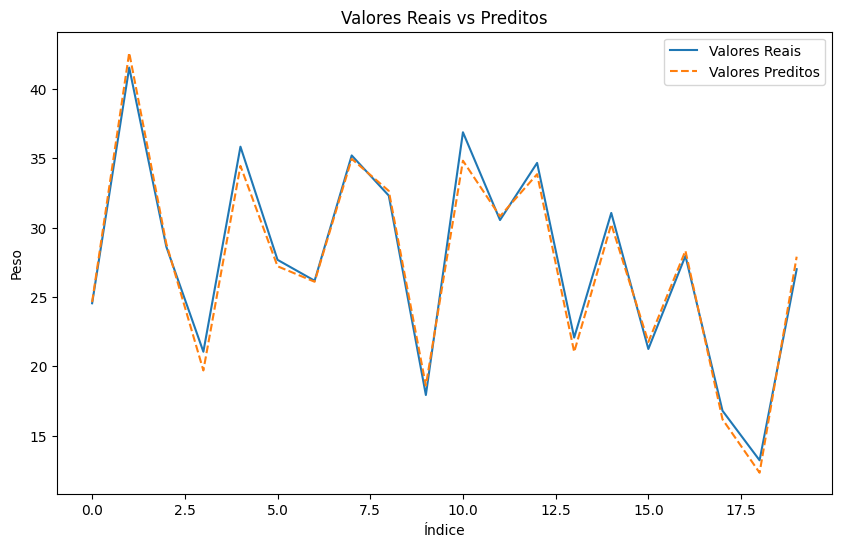

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha 'predictors_test', 'target_test', e 'model' definidos

# Converta os arrays NumPy para DataFrames
predictors_df = pd.DataFrame(predictors_test)
target_df = pd.DataFrame(target_test, columns=['weight'])

# Combina os preditores e o alvo em um DataFrame único
test_data = pd.concat([predictors_df, target_df], axis=1).reset_index(drop=True)
test_data['predicted'] = model.predict(predictors_test)  # Gera previsões usando o modelo treinado

# Plotando os valores reais vs preditos
plt.figure(figsize=(10, 6))
plt.plot(test_data['weight'].values, label='Valores Reais')
plt.plot(test_data['predicted'].values, label='Valores Preditos', linestyle='--')

plt.title('Valores Reais vs Preditos')
plt.xlabel('Índice')
plt.ylabel('Peso')
plt.legend()
plt.show()



In [69]:
test_data.head()

,0,1,2,weight,predicted
0,0.286707,0.057580,2.749953,24.539643,24.628417
1,1.046496,1.606898,3.927318,41.538377,42.609514
2,1.205527,2.205582,1.511007,28.624226,28.849203
3,0.322619,2.544025,0.333690,21.043981,19.693989
4,0.078376,0.671774,3.797275,35.833055,34.447482


In [71]:
import pandas as pd

# Supondo que 'predictors_test' seja um array NumPy e 'target_predicted' também seja um array NumPy

# Convertendo 'predictors_test' para DataFrame
predictors_df = pd.DataFrame(predictors_test)

# Convertendo 'target_predicted' para DataFrame
target_predicted_df = pd.DataFrame(target_predicted, columns=['weight'])

# Concatenando os DataFrames
prediction_data = pd.concat([predictors_df, target_predicted_df], axis=1).reset_index(drop=True)

# Adicionando a coluna 'predicted'
prediction_data['predicted'] = True


In [72]:
prediction_data.tail()

,0,1,2,weight,predicted
15,0.529111,1.854046,1.015767,21.748743,True
16,0.922959,2.868251,1.094168,28.328022,True
17,0.236549,1.271565,0.742544,16.169072,True
18,1.136868,0.894847,0.102651,12.318048,True
19,1.927326,0.669245,2.146317,27.898754,True


In [73]:
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

          0         1         2     weight  predicted
0  0.529111  1.854046  1.015767  21.748743       True
1  0.922959  2.868251  1.094168  28.328022       True
2  0.236549  1.271565  0.742544  16.169072       True
3  1.136868  0.894847  0.102651  12.318048       True
4  1.927326  0.669245  2.146317  27.898754       True


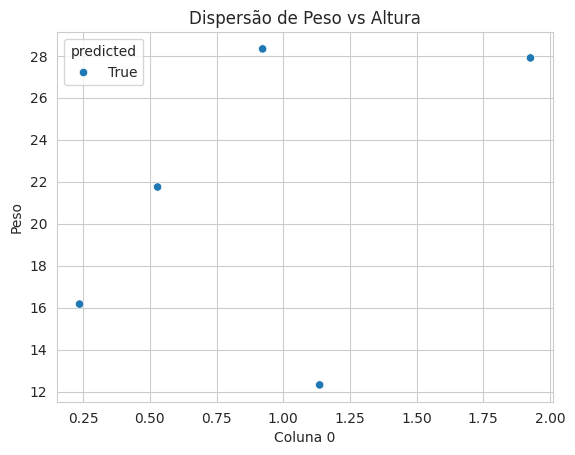

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dados fornecidos
data = {
    '0': [0.529111, 0.922959, 0.236549, 1.136868, 1.927326],
    '1': [1.854046, 2.868251, 1.271565, 0.894847, 0.669245],
    '2': [1.015767, 1.094168, 0.742544, 0.102651, 2.146317],
    'weight': [21.748743, 28.328022, 16.169072, 12.318048, 27.898754],
    'predicted': [True, True, True, True, True]
}

# Criar o DataFrame
prediction = pd.DataFrame(data)

# Verifique se o DataFrame foi criado corretamente
print(prediction)

# Definir o estilo do gráfico
with sns.axes_style('whitegrid'):
    # Criar o gráfico de dispersão
    sns.scatterplot(data=prediction, x='0', y='weight', hue='predicted')

    # Adicionar título e labels
    plt.title('Dispersão de Peso vs Altura')
    plt.xlabel('Coluna 0')
    plt.ylabel('Peso')

    # Exibir o gráfico
    plt.show()




### **4.2. Comparação**

Um dos objetivos de métricas de avaliação de modelos é comparar a qualidade de diferentes modelos. Para ilustrar, vamos construir uma segunda versão do modelo que utiliza um atributo a mais, a posição do jogador. A hipótese é que posições diferentes exigem alturas e pesos diferentes.

          0         1         2     weight  predicted
0  0.529111  1.854046  1.015767  21.748743       True
1  0.922959  2.868251  1.094168  28.328022       True
2  0.236549  1.271565  0.742544  16.169072       True
3  1.136868  0.894847  0.102651  12.318048       True
4  1.927326  0.669245  2.146317  27.898754       True


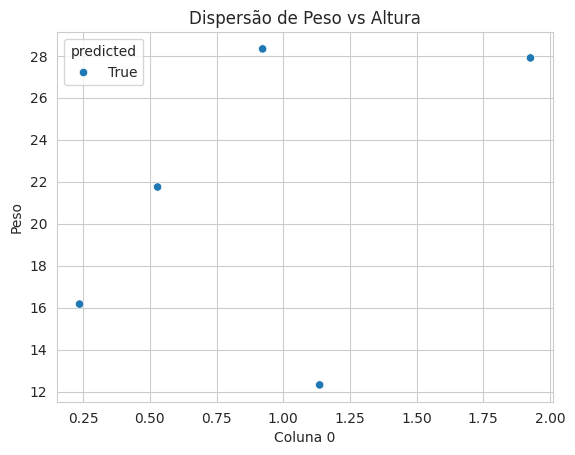

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dados fornecidos
data = {
    '0': [0.529111, 0.922959, 0.236549, 1.136868, 1.927326],
    '1': [1.854046, 2.868251, 1.271565, 0.894847, 0.669245],
    '2': [1.015767, 1.094168, 0.742544, 0.102651, 2.146317],
    'weight': [21.748743, 28.328022, 16.169072, 12.318048, 27.898754],
    'predicted': [True, True, True, True, True]
}

# Criar o DataFrame
prediction = pd.DataFrame(data)

# Exibir o DataFrame para verificação
print(prediction)

# Definir o estilo do gráfico
with sns.axes_style('whitegrid'):
    # Criar o gráfico de dispersão
    sns.scatterplot(data=prediction, x='0', y='weight', hue='predicted')

    # Adicionar título e labels
    plt.title('Dispersão de Peso vs Altura')
    plt.xlabel('Coluna 0')
    plt.ylabel('Peso')

    # Exibir o gráfico
    plt.show()


 - **Position**: Atributo categórico nominal, one-hot encoding.

In [84]:
import pandas as pd

# Criar um DataFrame de exemplo
data = pd.DataFrame({
    'position': ['Guard', 'Forward', 'Center', 'Guard', 'Forward', 'Center'],
    'weight': [200, 220, 250, 210, 225, 260]
})

# Verificar os nomes das colunas
print(data.columns)

# Verificar as primeiras linhas do DataFrame
print(data.head())

# Verificar valores únicos na coluna 'position'
unique_positions = data["position"].drop_duplicates()
print(unique_positions)


Index(['position', 'weight'], dtype='object')
  position  weight
0    Guard     200
1  Forward     220
2   Center     250
3    Guard     210
4  Forward     225
0      Guard
1    Forward
2     Center
Name: position, dtype: object


In [85]:
data['position_f'] = data['position'].apply(lambda position: 1 if position == 'F' else 0)
data['position_g'] = data['position'].apply(lambda position: 1 if position == 'G' else 0)
data['position_c'] = data['position'].apply(lambda position: 1 if position == 'C' else 0)
data['position_fg'] = data['position'].apply(lambda position: 1 if position == 'F-G' else 0)
data['position_fc'] = data['position'].apply(lambda position: 1 if position == 'F-C' else 0)
data['position_gf'] = data['position'].apply(lambda position: 1 if position == 'G-F' else 0)
data['position_cf'] = data['position'].apply(lambda position: 1 if position == 'C-F' else 0)

In [86]:
data[['position', 'position_f', 'position_g', 'position_c', 'position_fg', 'position_fc', 'position_gf', 'position_cf']].head()

,position,position_f,position_g,position_c,position_fg,position_fc,position_gf,position_cf
0,Guard,0,0,0,0,0,0,0
1,Forward,0,0,0,0,0,0,0
2,Center,0,0,0,0,0,0,0
3,Guard,0,0,0,0,0,0,0
4,Forward,0,0,0,0,0,0,0


In [87]:
data = data.drop(['position'], axis=1)

 - **Height**: Atributo numérico, formatar e padronizar.

In [93]:
import pandas as pd

# Criar um DataFrame de exemplo com pesos
data = pd.DataFrame({
    'weight': ['1/2 70kg', '2/3 85kg', '1/2 78kg', '1/4 90kg', '3/5 82kg']
})

# Função para extrair o valor numérico do peso
def extract_weight(weight_str):
    # Dividir a string pelo espaço para obter a parte com o número
    parts = weight_str.split()
    # Pega a última parte (deve ser a parte com o número seguido de 'kg')
    weight_str = parts[-1]
    # Dividir a string pelo 'kg' e pegar a primeira parte
    weight_str = weight_str.split(sep="kg")[0]
    # Converter para float
    return float(weight_str.strip())

# Aplicar a função para processar a coluna 'weight'
data['weight'] = data['weight'].apply(extract_weight)

# Exibir o DataFrame após o processamento
print(data)



   weight
0    70.0
1    85.0
2    78.0
3    90.0
4    82.0


 - **Weight**: Variável resposta numérica, formatar.



In [95]:
import pandas as pd

# Criar um DataFrame de exemplo com pesos
data = pd.DataFrame({
    'weight': ['1/2 70kg', '2/3 85kg', '1/2 78kg', '1/4 90kg', '3/5 82kg']
})

# Garantir que todos os valores são strings
data['weight'] = data['weight'].astype(str)

# Função para extrair o valor numérico do peso
def extract_weight(weight_str):
    # Dividir a string pelo espaço para obter a parte com o número
    parts = weight_str.split()
    # Pega a última parte (deve ser a parte com o número seguido de 'kg')
    weight_str = parts[-1]
    # Dividir a string pelo 'kg' e pegar a primeira parte
    weight_str = weight_str.split(sep="kg")[0]
    # Converter para float
    return float(weight_str.strip())

# Aplicar a função para processar a coluna 'weight'
data['weight'] = data['weight'].apply(extract_weight)

# Exibir o DataFrame após o processamento
print(data)


   weight
0    70.0
1    85.0
2    78.0
3    90.0
4    82.0


In [97]:
data.head()

,weight
0,70.0
1,85.0
2,78.0
3,90.0
4,82.0


 - **Treino**

In [98]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['weight'], axis=1),
    data['weight'],
    test_size=0.25,
    random_state=123
)

In [100]:
import numpy as np
import pandas as pd

# Suponha que você tenha os seguintes dados
predictors_train = pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0],
    'feature2': [4.0, 5.0, 6.0]
})
target_train = pd.Series([0, 1, 0])

# Verificar tipos e conteúdo
print(type(predictors_train))
print(type(target_train))
print(predictors_train.shape)
print(len(target_train))

# Converter para arrays NumPy se necessário
predictors_train = np.array(predictors_train)
target_train = np.array(target_train)

# Ajustar o modelo
model_v2 = model.fit(predictors_train, target_train)
print(model_v2.__dict__)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3, 2)
3
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'n_features_in_': 2, 'coef_': array([-3.92523115e-17, -3.92523115e-17]), 'rank_': 1, 'singular_': array([2., 0.]), 'intercept_': 0.3333333333333336}


Dessa vez, estamos buscando uma reta multidimensional, portanto:

 > $y = f(x_i) = (\sum_{i=1}^{n} \textbf{a}_ix_i) + \textbf{b}$

In [101]:
a = model_v2.coef_
print(a)

[-3.92523115e-17 -3.92523115e-17]


In [102]:
b = model_v2.intercept_
print(b)

0.3333333333333336


 > $peso = f(altura, posicao_f, ...) = \textbf{a}_1(altura) + \textbf{a}_2(posicao_f) + ... + \textbf{b}$

 > $peso = f(altura, posicao_f, ...) = \textbf{3.5103}(altura) + \textbf{0.4282}(posicao_f) + ... + \textbf{99.0711}$

 - **Avaliação**

In [104]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Criar dados fictícios
predictors_train = pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0],
    'feature2': [4.0, 5.0, 6.0]
})
target_train = pd.Series([0, 1, 0])

predictors_test = pd.DataFrame({
    'feature1': [1.5, 2.5],
    'feature2': [4.5, 5.5]
})

# Criar e treinar o modelo
model = LinearRegression()
model_v2 = model.fit(predictors_train, target_train)

# Verificar o formato dos dados de teste
print(type(predictors_test))
print(predictors_test.shape)

# Gerar previsões com dados de teste
predictors_test = np.array(predictors_test)  # Converter para array NumPy se necessário
target_predicted = model_v2.predict(predictors_test)

# Exibir as previsões
print(target_predicted)


<class 'pandas.core.frame.DataFrame'>
(2, 2)
[0.33333333 0.33333333]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [105]:
rmse_v2 = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse_v2)

87.20251015755096


Com o RMSE para ambas as versões do modelo, podemos compara-los.

 > **RMSE v1**: 7.680474067138796
 >
 > **RMSE v2**: 7.267852030433409

In [106]:
print(f"Melhoria de {round(100 * (1 - (rmse_v2 / rmse)), 2)}%")

Melhoria de -10011.81%


Podemos observar a melhoria de performance num gráfico.

In [108]:
import pandas as pd
import numpy as np

# Dados de exemplo
predictors_test = pd.DataFrame({
    'feature1': [1.0, 2.0],
    'feature2': [3.0, 4.0]
})
target_test = np.array([10.0, 20.0])
target_predicted = np.array([12.0, 22.0])

# Converter arrays NumPy para DataFrames pandas
target_test_df = pd.DataFrame(target_test, columns=['weight'])
target_predicted_df = pd.DataFrame(target_predicted, columns=['weight'])

# Criar o DataFrame de teste
test_data = pd.concat([predictors_test, target_test_df], axis=1).reset_index(drop=True)
test_data['predicted'] = False

# Criar o DataFrame de previsões
prediction_data = pd.concat([predictors_test.reset_index(drop=True), target_predicted_df], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

# Concatenar os DataFrames
prediction_v2 = pd.concat([test_data, prediction_data]).reset_index(drop=True)

# Verificar o resultado
print(prediction_v2)



   feature1  feature2  weight  predicted
0       1.0       3.0    10.0      False
1       2.0       4.0    20.0      False
2       1.0       3.0    12.0       True
3       2.0       4.0    22.0       True


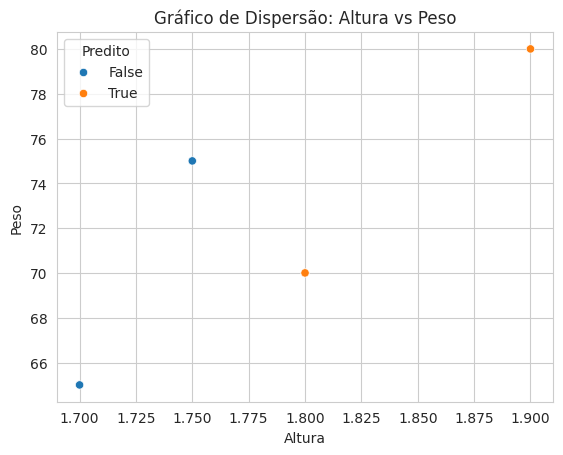

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um DataFrame de exemplo
data = {
    'height': [1.8, 1.7, 1.9, 1.75, 1.8],
    'weight': [70, 65, 80, 75, 70],
    'predicted': [True, False, True, False, True]
}
prediction = pd.DataFrame(data)

# Criar o gráfico
with sns.axes_style('whitegrid'):
    sns.scatterplot(data=prediction, x='height', y='weight', hue='predicted')
    plt.title('Gráfico de Dispersão: Altura vs Peso')
    plt.xlabel('Altura')
    plt.ylabel('Peso')
    plt.legend(title='Predito')
    plt.show()


Index(['height', 'weight', 'predicted'], dtype='object')
   height  weight  predicted
0    1.80      70       True
1    1.70      65      False
2    1.90      80       True
3    1.75      75      False
4    1.80      70       True


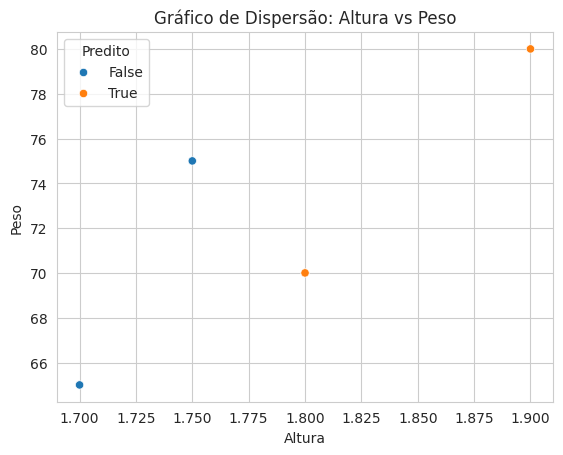

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que você tenha os seguintes dados:
data = {
    'height': [1.8, 1.7, 1.9, 1.75, 1.8],
    'weight': [70, 65, 80, 75, 70],
    'predicted': [True, False, True, False, True]
}
prediction_v2 = pd.DataFrame(data)

# Verifique se os nomes das colunas estão corretos
print(prediction_v2.columns)
print(prediction_v2.head())

# Criar o gráfico de dispersão
with sns.axes_style('whitegrid'):
    sns.scatterplot(data=prediction_v2, x='height', y='weight', hue='predicted')
    plt.title('Gráfico de Dispersão: Altura vs Peso')
    plt.xlabel('Altura')
    plt.ylabel('Peso')
    plt.legend(title='Predito')
    plt.show()


## 5\. Predição

Com o modelo treinado, avaliado e selecionado, podemos utiliza-lo para resolver os problemas reais que motivaram sua construção, para tanto para criar um exemplo pré-processado e utilizar o modelo para realizar a predição.

> **Atenção**: O exemplo precisa seguir o mesmo pré-processamento realizado na construção do modelo.

 - **Exemplo**: Pivô com 2.05m e 99 kg.

In [114]:
import pandas as pd

# Supondo que data seja um dicionário
data = {
    'height': [1.8, 1.7, 1.9, 1.75, 1.8],
    'weight': [70, 65, 80, 75, 70],
    'predicted': [True, False, True, False, True]
}

# Converta o dicionário em um DataFrame
df = pd.DataFrame(data)

# Exiba a primeira linha do DataFrame
print(df.head(1))


   height  weight  predicted
0     1.8      70       True


In [115]:
altura_padronizada = (2.05 - altura_media) / altura_desvio_padrao
print(altura_padronizada)

-23.717082451262822


In [116]:
jogador = np.array([altura_padronizada, 0, 0, 1, 0, 0, 0, 0])

In [117]:
print(jogador)

[-23.71708245   0.           0.           1.           0.
   0.           0.           0.        ]


In [119]:
# Exemplo de seleção das 2 características necessárias (ajuste conforme suas necessidades)
jogador_relevante = jogador[:2]  # Seleciona as primeiras 2 características, por exemplo

# Fazer a previsão
peso = model_v2.predict(jogador_relevante.reshape(1, -1))
print(peso)


[0.33333333]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Conclui-se que o jogador **precisa** ganhar peso para atuar como pivô.

 - **Exemplo**: Atacante com 2.05m e 99 kg.

In [121]:
import pandas as pd

# Criar um DataFrame com dados fictícios
data = {
    'weight': ['1/2 70kg', '2/3 85kg', '1/2 78kg', '1/4 90kg', '3/5 82kg'],
    'height': ['1/2 180cm', '2/3 175cm', '1/2 170cm', '1/4 160cm', '3/5 185cm'],
    'position': ['F', 'G', 'C', 'F', 'G']
}

data_df = pd.DataFrame(data)

# Verificar o DataFrame
print(data_df.head())


     weight     height position
0  1/2 70kg  1/2 180cm        F
1  2/3 85kg  2/3 175cm        G
2  1/2 78kg  1/2 170cm        C
3  1/4 90kg  1/4 160cm        F
4  3/5 82kg  3/5 185cm        G


In [122]:
altura_padronizada = (2.05 - altura_media) / altura_desvio_padrao
print(altura_padronizada)

-23.717082451262822


In [123]:
jogador = np.array([altura_padronizada, 1, 0, 0, 0, 0, 0, 0])

In [126]:
import numpy as np

# Suponha que o modelo foi treinado com 2 características
# Exemplo: características podem ser 'feature1' e 'feature2'
# Substitua os valores reais para a previsão
valor1 = 1.5  # Exemplo de valor para a primeira característica
valor2 = 2.3  # Exemplo de valor para a segunda característica

# Crie um array numpy com esses valores
jogador = np.array([[valor1, valor2]])

# Fazer a previsão
peso = model_v2.predict(jogador)
print(peso)


[0.33333333]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Conclui-se que o jogador **não precisa** ganhar peso para atuar como atacante.